# Tensor learning as a special neural network

Given the input data $\textbf{x} = [x_1, \ldots, x_n]^T \in \mathbb{R}^n$, an usual neural network uses a few number of layers with weights and activation functions in order to compute the respective output $\textbf{y} \in \mathbb{R}^m$. Each weight is a matrix, usually bigger than $n \times n$ (except in the last layer). As an alternative to a neural network, we propose to use $m$ tensors $\mathcal{T}_1, \ldots, \mathcal{T}_m \in \mathbb{R}^{I_1 \times \ldots \times I_L}$, given by

$$\mathcal{T}_k = \sum_{r=1}^R \textbf{w}_r^{(k,1)} \otimes \ldots \otimes \textbf{w}_r^{(k,L)},$$
for $I_1 = I_2 = \ldots = I_L = n$ and $k = 1 \ldots m$.

Each $\mathcal{T}_k$ is responsible for one output and each $\textbf{w}_r^{(k,\ell)} \in \mathbb{R}^n$ is a vector of weights. These weights are going to be computed in the same way we compute the weights of a neural network, that is, by minimizing a cost function. In this model, the input-output function, also called the *hypothesis*, is the function $h: \mathbb{R}^n \to \mathbb{R}^m$ defined as

$$ 	h(\textbf{x}) = \textbf{f}\left[
	\begin{array}{c}
    	\mathcal{T}_1(\underbrace{\textbf{x}, \ldots, \textbf{x}}_{L \text{ times}})\\
    	\vdots\\
    	\mathcal{T}_m(\underbrace{\textbf{x}, \ldots, \textbf{x}}_{L \text{ times}})\\
	\end{array}
\right]	$$
where $\textbf{f}:\mathbb{R}^m \to \mathbb{R}$ is defined as $\textbf{f} = (\underbrace{f, \ldots, f}_{m \text{ times}})$ for a nonlinear function $f:\mathbb{R} \to \mathbb{R}$. If one wants to write the hypothesis function in explicit form, then we have that

$$h(\textbf{x}) = \textbf{f} \left[
	\begin{array}{c}
   		\sum_{r=1}^R \prod_{\ell=1}^L \langle \textbf{w}_r^{(1,\ell)}, \textbf{x} \rangle  \\
   		\vdots\\
   		\sum_{r=1}^R \prod_{\ell=1}^L \langle \textbf{w}_r^{(m,\ell)}, \textbf{x} \rangle  \\
	\end{array}
\right] = $$

$$ = \left[
	\begin{array}{c}
   		f\left( \sum_{r=1}^R \sum_{i_1, \ldots, i_L=1}^n w_{i_1 r}^{(1,1)} \ldots w_{i_\ell r}^{(1,L)} x_{i_1} \ldots x_{i_L} \right) \\
   		\vdots\\
   		f\left( \sum_{r=1}^R \sum_{i_1, \ldots, i_L=1}^n w_{i_1 r}^{(m,1)} \ldots w_{i_\ell r}^{(m,L)} x_{i_1} \ldots x_{i_L} \right) \\
	\end{array}
\right].$$

Notice that $rank(\mathcal{T}_k) \leq R$ by construction. As is usual in machine learning algorithms, we use the convention $\textbf{x} = [1, x_2, \ldots, x_n]^T$, that is, $x_1 = 1$ is the bias of the model. Now let $S = \{ (i_1, \ldots, i_L): 1 \leq i_1, \ldots, i_L \leq n, \ (i_1, \ldots, i_L) \neq (1, \ldots, 1) \}$, then we can write the above expression as 

$$ \left[
	\begin{array}{c}
   		f\left( b_1 + \sum_{r=1}^R \sum_{(i_1, \ldots, i_L) \in S} w_{i_1 r}^{(1,1)} \ldots w_{i_L r}^{(1,L)} x_{i_1} \ldots x_{i_L} \right) \\
   		\vdots\\
   		f\left( b_m + \sum_{r=1}^R \sum_{(i_1, \ldots, i_L) \in S} w_{i_1 r}^{(m,1)} \ldots w_{i_L r}^{(m,L)} x_{i_1} \ldots x_{i_L} \right) \\
	\end{array}
\right]$$
where each $b_k = \sum_{r=1}^R (w_{1 r}^{(k,1)})^{L}$ is a bias parameter of the model.


In a neural network each activation function receives a weighted sum of the form 
$$\sum_{j=1}^n w_j x_j,$$
whereas in the tensor learning we have multilinear weighted sums of the form 

$$\sum_{i_1, \ldots, i_L=1}^n w_{i_1 r}^{(k,1)} \ldots w_{i_L r}^{(k,L)} x_{i_1} \ldots x_{i_L}$$ 
and just one activation per output. Contrary to the neural network model where we have lots of activations and few direct interactions between the weights (by *direct interactions* we mean multiplications between the weights), in the tensor learning approach we have few activations and lots of direct interactions between the weights, through the multilinearity. Our hope is that this multilinearity compensates the lack of activation functions. We start importing the necessary modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import TensorFox as tfx
import TensorFox.TensorLearning as tl

In [2]:
# LOAD DATA

# Load train dataset (source: https://www.kaggle.com/c/digit-recognizer)

data = pd.read_csv('train.csv')
data_array = data.values
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# PREPROCESSING

# The first column are the labels, so we create the input array X and the label array Y accordingly.
num_samples, n = data_array.shape[0], data_array.shape[1] - 1
X = data_array[:, 1:]
Y = data_array[:, 0]

# Use data augmentation so we have the same number of members in each class.
T, X, Y = tl.data2tens(X, Y, p=0, var_type='int', display=True)
    
# Shuffle data to avoid bias from ordering.
num_samples = X.shape[0]
idx = np.arange(num_samples)
np.random.shuffle(idx)
X = X[idx,:]
Y = Y[idx]

# Split data in train and validate datasets.
X_train = X[:32000, :]
Y_train = Y[:32000]
X_val = X[32000:, :]
Y_val = Y[32000:]

# Load test dataset.
data = pd.read_csv('test.csv')
X_test = data.values

(42000, 784) (42000,)
Inputs of class 0 = 4132
Inputs of class 1 = 4684
Inputs of class 2 = 4177
Inputs of class 3 = 4351
Inputs of class 4 = 4072
Inputs of class 5 = 3795
Inputs of class 6 = 4137
Inputs of class 7 = 4401
Inputs of class 8 = 4063
Inputs of class 9 = 4188

After fixing number of inputs per class:
Inputs of class 0 = 4684
Inputs of class 1 = 4684
Inputs of class 2 = 4684
Inputs of class 3 = 4684
Inputs of class 4 = 4684
Inputs of class 5 = 4684
Inputs of class 6 = 4684
Inputs of class 7 = 4684
Inputs of class 8 = 4684
Inputs of class 9 = 4684
(46840, 784) (46840,)


In [4]:
# Normalize data.
X_train, mu, sigma = tl.normalization(X_train, method='mean_normalization')
print('mean =', mu, 'sigma =', sigma)

# p is the level of precision of the PCA function. The function 'prepare_data' also add a bias input to the train dataset.
p = 0.9
X_bias, U = tl.prepare_data(X_train, p)

# Normalize and make pca with validation dataset.
X_val = tl.norm_pca(X_val, U, mu, sigma)

# Print the dimensions of the dataset to be used in the training.
print('Train dataset dimensions =', X_bias.shape)

mean = 33.60118271683673 sigma = 255
Train dataset dimensions = (32000, 65)


# Structure of the model

It is possible to interpret tensor learning as a neural network (with 2 hidden layers) which relies almost entirely on the classic dot product plus activation function recipe. This interpretation shades more light on what is really happening and why tensor learning may be a valid alternative to the classic neural network. 

The figure below shows the architecture of such interpretation for $n=3, m=2, L=2, R=2$. The red lines represents classic neural network connections, that is, each line has a weight which is multiplied by the input and summed with all other lines reaching the same neuron. Blue lines means to multiply the inputs by the inputs of all other lines reaching the same neuron. The first layer of lines contains all the weights in our model. The second layer of lines makes the multiplications, and is in this part where we the model is no more the classic one. The third layer of lines are classic neural network connections with all weights equal to 1. Except for the last layer of neurons (the output layer), all other neurons have activation function equals the identity function. In the last layer the activation function is the nonlinear function $f$. We can note that the blue lines are the great novelty in this approach compared to the classic neural network. They represent the part where the weights are mixed together. Also note that this special neural network has *m R L + m R + m* neurons. This usually will be much smaller than any neural network applied to the same problem, because a neural network uses $\mathcal{O}(n)$ neurons at the first layers, and we almost always have that $m, R, L \ll n$.

![neural](neural.png)

Epoch 1: [=============================================================================== ] 100.0% / acc=23.65%
Epoch 2: [=============================================================================== ] 100.0% / acc=24.34%
Epoch 3: [=============================================================================== ] 100.0% / acc=29.77%
Epoch 4: [=============================================================================== ] 100.0% / acc=28.77%
Epoch 5: [=============================================================================== ] 100.0% / acc=32.03%
Epoch 6: [=============================================================================== ] 100.0% / acc=36.29%
Epoch 7: [=============================================================================== ] 100.0% / acc=46.5%
Epoch 8: [=============================================================================== ] 100.0% / acc=56.34%
Epoch 9: [=============================================================================== ] 100.0% / acc=

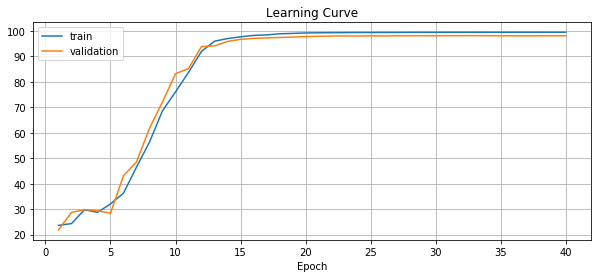

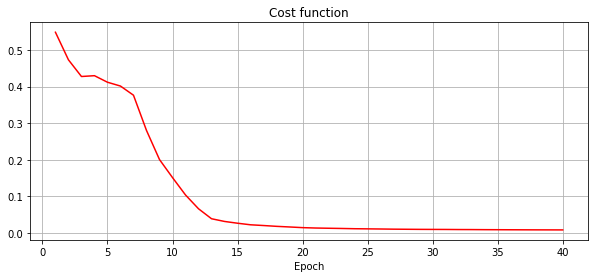

Accuracy over entire dataset = 98.99 %



In [5]:
# TRAINING

# The parameters used below were obtained after a hyperparameter grid search. 

# Number of factor matrices (order of the tensors)
L = 3
# Rank
R = 20
# Learning rate parameter
alpha = 0.03
# Learning decay parameter
alpha_decay = 0.95
# Regularization parameter
Lambda = 0.0003
# Number of epochs
epochs = 40
# Batch size
batch = 1

# Initialize weights
m = int(max(Y)) + 1
n = X_bias.shape[1]
W = tl.init_W(m, L, n, R)

# Train model
W, accuracy, accuracy_val, cost_function, success = tl.cpd_train(X_bias, Y, X_val, Y_val, W, 
                                                                 alpha=alpha, alpha_decay=alpha_decay, 
                                                                 Lambda=Lambda, 
                                                                 epochs=epochs, batch=batch, 
                                                                 display=True)

accuracy_dataset = tl.cpd_test(X, Y, W, U, mu=mu, sigma=sigma)
print('Accuracy over entire dataset =', np.round(accuracy_dataset, 3), '%')
print('===============================================')
print()

Our final task now is to use our model to make predictions over the test dataset and then save these predictions in a csv file. Note that the function **cpd_predictions** must receive the parameters *U, mu* and *sigma*, so that the test dataset is normalized and the correct PCA is performed before the predictions are made.

In [6]:
# Make predictions and save them in a csv file.
predictions = tl.cpd_predictions(X_test, W, U, mu=mu, sigma=sigma)
submission = pd.read_csv('sample_submission.csv')
submission["Label"] = predictions
submission.to_csv('cpd_submission.csv', index=False)
print(submission.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


With this approach we could achieve a score of $0.978$ ($97.8 \%$ of accuracy) in the Kaggle's competition [digit recognizer](https://www.kaggle.com/c/digit-recognizer).

# Using the CPD to simplify the model

After we have a set of weights, we may wonder if there are redundant weights. One way to simplify the model is to approximate each tensor $\mathcal{T}_k$ by another with rank lower than the current one, which is $R = 20$. We use the function **simplify_model** to obtain a simplified model. Let's see the error of the CPD approximations for the ranks $r=1 \ldots 20$.

Testing rank = 1
Testing rank = 2
Testing rank = 3
Testing rank = 4
Testing rank = 5
Testing rank = 6
Testing rank = 7
Testing rank = 8
Testing rank = 9
Testing rank = 10
Testing rank = 11
Testing rank = 12
Testing rank = 13
Testing rank = 14
Testing rank = 15
Testing rank = 16
Testing rank = 17
Testing rank = 18
Testing rank = 19
Testing rank = 20


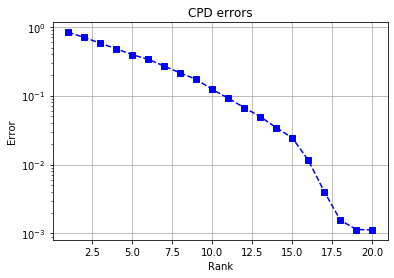

In [7]:
# We try to find a CPD with rank less than 20 for the tensors. 
# options=False means we are using default parameters for the cpd function.

# Initialize variables.
best_of = 3
dims = L*(X_bias.shape[1], )
T_approx = np.zeros(dims)
ranks = range(1, 21)
errors = []

class options:
    inner_method = 'cg_static'

for r in ranks:
    print('Testing rank =', r)
    # Try to compute the CPD a few times.
    best_new_errors = np.inf
    for i in range(best_of):
        new_W, new_errors = tl.simplify_model(W, r, options)
        new_errors = np.array(new_errors).mean()
        if new_errors < best_new_errors:
            best_new_errors = new_errors
    errors.append(best_new_errors)
        
# Plot results.
plt.plot(ranks, errors, 'b--')
plt.plot(ranks, errors, 'bs')
plt.title('CPD errors')
plt.xlabel('Rank')
plt.ylabel('Error')
plt.yscale('log')
plt.grid()
plt.show()

Based on the figure above we choose to use $R = 18$, which is the first rank with error less than $10^{-2}$. To obtain a reasonable set of CPDs approximations we repeat the call to **simplify_model** a few times and keep the best result.

In [8]:
R = 18
best_of = 15
best_new_errors = np.inf
for i in range(best_of):
    new_W, new_errors = tl.simplify_model(W, R, options)
    new_errors = np.array(new_errors).mean()
    if new_errors < best_new_errors:
        best_new_W = new_W.copy()
        best_new_errors = new_errors
print(best_new_errors)

0.0014870479345794013


In [9]:
# Make predictions and save them in a csv file.
predictions = tl.cpd_predictions(X_test, best_new_W, U, mu=mu, sigma=sigma)
submission = pd.read_csv('sample_submission.csv')
submission["Label"] = predictions
submission.to_csv('cpd_submission.csv', index=False)
print(submission.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


With this approach we could achieve a score of $0.97789$ in the Kaggle's competition. Therefore it is possible to simplify the model and still mantain (almost) the same accuracy. In this case the original model (for $R = 20$) had $10 \times 3 \times 65 \times 20 = 39000$ parameters, whereas the simplified model ($R = 18$) have $10 \times 3 \times 65 \times 18 = 35100$ parameters.